In [311]:
#Importing the required libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

In [312]:
cash = pd.read_csv('/home/ubuntu/Ironhack_all/Ironhack_2ndProject/project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('/home/ubuntu/Ironhack_all/Ironhack_2ndProject/project_dataset/extract - fees - data analyst - .csv')

In [313]:
cash[cash['user_id'].isna()]
#even when the student cancels the account, we can retrieve the user_id from "deleted_id".
#It provides valuable info as some students deleted the account after paying back.


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
7,654,100.0,rejected,2020-02-10 01:11:53.80827+00,2020-02-10 11:53:32.104131+00,NaN,2020-02-10 09:11:21.350695+00,309.0,2020-03-11 01:11:53.80793+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
8,5672,100.0,canceled,2020-06-28 12:06:33.71284+00,2020-06-28 12:06:33.712853+00,NaN,NaN,2499.0,2020-07-07 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
19,545,100.0,rejected,2020-01-29 13:53:03.343598+00,2020-02-08 06:21:16.156719+00,NaN,2020-01-29 14:39:11.563872+00,304.0,2020-02-28 13:53:03.343216+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
21,613,100.0,rejected,2020-02-05 17:37:56.852948+00,2020-02-08 06:21:16.15229+00,NaN,2020-02-06 12:48:09.880702+00,304.0,2020-03-08 17:37:56.842421+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
25,84,100.0,rejected,2019-12-11 07:30:42.567035+00,2020-01-10 16:58:06.837117+00,NaN,2020-01-10 16:58:06.830329+00,91.0,2020-01-10 07:30:42.567035+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23922,23989,25.0,money_back,2020-10-24 10:22:05.934286+00,2020-12-18 13:14:25.891447+00,NaN,NaN,29610.0,2020-11-03 10:22:40.194197+00,NaN,2020-11-16 02:57:54.235926+00,instant,2020-10-24 10:22:40.194197+00,completed,2020-11-13 22:40:42.99552+00,2020-11-16 02:57:54.252045+00
23925,22913,100.0,money_back,2020-10-21 22:00:18.904317+00,2020-12-18 13:11:15.976246+00,NaN,NaN,30404.0,2020-11-09 23:51:00+00,2020-10-23,2020-11-10 19:51:45.285165+00,instant,2020-10-21 22:00:45.462413+00,NaN,NaN,NaN
23929,22641,100.0,money_back,2020-10-21 00:46:36.5907+00,2020-12-18 13:15:45.384787+00,NaN,NaN,29911.0,2020-12-06 23:00:00+00,2020-10-22,2020-12-10 23:00:00+00,instant,2020-10-21 00:47:58.826568+00,NaN,NaN,NaN
23940,23832,25.0,money_back,2020-10-23 22:56:09.02721+00,2020-12-18 13:11:28.776102+00,NaN,NaN,29803.0,2020-12-04 23:00:00+00,2020-10-24,2020-12-08 23:00:00+00,instant,2020-10-23 22:56:42.839064+00,NaN,NaN,NaN


In [314]:
cash['recovery_status'].count() #only 3330 payment incidents in total. Those that never had problems don't have status.

3330

In [315]:
#Creating a subset with the necessary columns only
cash_cohort = cash[['id','user_id','created_at','deleted_account_id','recovery_status']]


#Filling missing user_ids using deleted_account_id
cash_cohort['user_id'] = cash_cohort['user_id'].fillna(cash_cohort['deleted_account_id'])

#Make sure no more missing user_ids
cash_cohort[cash_cohort['user_id'].isna()]

/tmp/ipykernel_167227/4044134743.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cash_cohort['user_id'] = cash_cohort['user_id'].fillna(cash_cohort['deleted_account_id'])


,id,user_id,created_at,deleted_account_id,recovery_status


In [316]:
#Dropping deleted_account_id because I no longer need it:
cash_cohort = cash_cohort.drop('deleted_account_id', axis='columns')
cash_cohort.head(1)

,id,user_id,created_at,recovery_status
0,5,804.0,2019-12-10 19:05:21.596873+00,NaN


In [317]:
#I'm transforming the "created_at" to datetime for manipulation afterwards
cash_cohort['created_at'] = pd.to_datetime(cash_cohort['created_at'])


cash_cohort['cohort group'] = cash_cohort.groupby('user_id')['created_at'].transform('min').dt.to_period('M') #Getting the minimum date from each unique person, and getting YYYY-MM
cash_cohort['usage date'] = cash_cohort['created_at'].dt.to_period('M')  #Getting the dates they make cash request in YYYY-MM too (as they can make as many as they want)

#Calculating how many months have passed between creation date and another cash request. If they're the same, it will be 0
cash_cohort['Passed months'] = (cash_cohort['usage date'].dt.year - cash_cohort['cohort group'].dt.year)*12 + cash_cohort['usage date'].dt.month - cash_cohort['cohort group'].dt.month

cash_cohort

/tmp/ipykernel_167227/3408187512.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_cohort['cohort group'] = cash_cohort.groupby('user_id')['created_at'].transform('min').dt.to_period('M') #Getting the minimum date from each unique person, and getting YYYY-MM
/tmp/ipykernel_167227/3408187512.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash_cohort['usage date'] = cash_cohort['created_at'].dt.to_period('M')  #Getting the dates they make cash request in YYYY-MM too (as they can make as many as they want)


,id,user_id,created_at,recovery_status,cohort group,usage date,Passed months
0,5,804.0,2019-12-10 19:05:21.596873+00:00,NaN,2019-12,2019-12,0
1,70,231.0,2019-12-10 19:50:12.347780+00:00,NaN,2019-12,2019-12,0
2,7,191.0,2019-12-10 19:13:35.825460+00:00,NaN,2019-12,2019-12,0
3,10,761.0,2019-12-10 19:16:10.880172+00:00,NaN,2019-12,2019-12,0
4,1594,7686.0,2020-05-06 09:59:38.877376+00:00,NaN,2020-05,2020-05,0
...,...,...,...,...,...,...,...
23965,20616,13681.0,2020-10-12 13:54:11.686225+00:00,NaN,2020-06,2020-10,4
23966,25243,30367.0,2020-10-27 14:41:25.734910+00:00,completed,2020-10,2020-10,0
23967,22357,82122.0,2020-10-20 07:58:04.006937+00:00,NaN,2020-10,2020-10,0
23968,20256,64517.0,2020-10-10 05:40:55.700422+00:00,NaN,2020-10,2020-10,0


In [318]:
cash_cohort[cash_cohort['user_id']==13681.0] #Checking a random user

,id,user_id,created_at,recovery_status,cohort group,usage date,Passed months
13997,2771,13681.0,2020-06-09 11:55:34.299738+00:00,completed,2020-06,2020-06,0
23965,20616,13681.0,2020-10-12 13:54:11.686225+00:00,NaN,2020-06,2020-10,4


In [319]:
groupped_cohort = cash_cohort.groupby(['cohort group', 'Passed months'])['user_id'].nunique().reset_index()

cohort_pivot = groupped_cohort.pivot(index='cohort group', columns='Passed months', values='user_id')

Initial_users = cohort_pivot[0]
Initial_users

cohort group
2019-11       1.0
2019-12     254.0
2020-01     106.0
2020-02      90.0
2020-03      86.0
2020-04     246.0
2020-05     432.0
2020-06    1540.0
2020-07    1482.0
2020-08     728.0
2020-09    1950.0
2020-10    4802.0
2020-11      76.0
Freq: M, Name: 0, dtype: float64

In [327]:
incident_cohort = cash_cohort.groupby(['cohort group', 'Passed months'])['recovery_status'].count().reset_index() #count doesn't include nulls by default
incident_cohort

,cohort group,Passed months,recovery_status
0,2019-11,0,0
1,2019-11,1,0
2,2019-11,5,0
3,2019-11,6,0
4,2019-11,9,0
...,...,...,...
78,2020-09,1,134
79,2020-09,2,4
80,2020-10,0,879
81,2020-10,1,5


In [320]:
cohort_graph = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0) # Storing a version for graph later
cohort_pivot_n = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0) * 100


In [321]:
cohort_pivot_n.iloc[0] = cohort_pivot.iloc[0].fillna(0) #filling specific spots with 0 to differentiate actual 0s to no data yet  
cohort_pivot_n.loc['2020-02',9] = 0
cohort_pivot_n.loc['2020-04',7] = 0

cohort_graph.iloc[0] = cohort_pivot.iloc[0].fillna(0) #filling specific spots with 0 to differentiate actual 0s to no data yet  
cohort_graph.loc['2020-02',9] = 0
cohort_graph.loc['2020-04',7] = 0

cohort_pivot_n

Passed months,0,1,2,3,4,5,6,7,8,9,10,11
cohort group,,,,,,,,,,,,
2019-11,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
2019-12,100.0,35.433071,22.834646,26.771654,26.377953,29.527559,28.740157,23.228346,26.377953,16.929134,24.409449,0.393701
2020-01,100.0,20.754717,15.094340,25.471698,25.471698,25.471698,26.415094,19.811321,18.867925,22.641509,0.943396,NaN
2020-02,100.0,50.000000,46.666667,46.666667,43.333333,43.333333,40.000000,27.777778,37.777778,0.000000,NaN,NaN
2020-03,100.0,44.186047,43.023256,52.325581,41.860465,39.534884,33.720930,31.395349,1.162791,NaN,NaN,NaN
2020-04,100.0,47.154472,49.593496,37.398374,32.520325,30.894309,24.796748,0.000000,NaN,NaN,NaN,NaN
2020-05,100.0,59.027778,50.694444,43.055556,34.027778,35.648148,0.925926,NaN,NaN,NaN,NaN,NaN
2020-06,100.0,49.090909,48.246753,37.272727,36.753247,0.324675,NaN,NaN,NaN,NaN,NaN,NaN
2020-07,100.0,47.435897,34.480432,35.964912,0.472335,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
cohort_graph

Passed months,0,1,2,3,4,5,6,7,8,9,10,11
cohort group,,,,,,,,,,,,
2019-11,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
2019-12,1.0,0.354331,0.228346,0.267717,0.263780,0.295276,0.287402,0.232283,0.263780,0.169291,0.244094,0.003937
2020-01,1.0,0.207547,0.150943,0.254717,0.254717,0.254717,0.264151,0.198113,0.188679,0.226415,0.009434,NaN
2020-02,1.0,0.500000,0.466667,0.466667,0.433333,0.433333,0.400000,0.277778,0.377778,0.000000,NaN,NaN
2020-03,1.0,0.441860,0.430233,0.523256,0.418605,0.395349,0.337209,0.313953,0.011628,NaN,NaN,NaN
2020-04,1.0,0.471545,0.495935,0.373984,0.325203,0.308943,0.247967,0.000000,NaN,NaN,NaN,NaN
2020-05,1.0,0.590278,0.506944,0.430556,0.340278,0.356481,0.009259,NaN,NaN,NaN,NaN,NaN
2020-06,1.0,0.490909,0.482468,0.372727,0.367532,0.003247,NaN,NaN,NaN,NaN,NaN,NaN
2020-07,1.0,0.474359,0.344804,0.359649,0.004723,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
cohort_pivot_n = cohort_pivot_n.applymap(lambda x: '{:.2f}%'.format(x) if pd.notna(x) else '' )

cohort_pivot_n

/tmp/ipykernel_167227/766882359.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cohort_pivot_n = cohort_pivot_n.applymap(lambda x: '{:.2f}%'.format(x) if pd.notna(x) else '' )


Passed months,0,1,2,3,4,5,6,7,8,9,10,11
cohort group,,,,,,,,,,,,
2019-11,1.00%,1.00%,0.00%,0.00%,0.00%,1.00%,1.00%,0.00%,0.00%,1.00%,1.00%,1.00%
2019-12,100.00%,35.43%,22.83%,26.77%,26.38%,29.53%,28.74%,23.23%,26.38%,16.93%,24.41%,0.39%
2020-01,100.00%,20.75%,15.09%,25.47%,25.47%,25.47%,26.42%,19.81%,18.87%,22.64%,0.94%,
2020-02,100.00%,50.00%,46.67%,46.67%,43.33%,43.33%,40.00%,27.78%,37.78%,0.00%,,
2020-03,100.00%,44.19%,43.02%,52.33%,41.86%,39.53%,33.72%,31.40%,1.16%,,,
2020-04,100.00%,47.15%,49.59%,37.40%,32.52%,30.89%,24.80%,0.00%,,,,
2020-05,100.00%,59.03%,50.69%,43.06%,34.03%,35.65%,0.93%,,,,,
2020-06,100.00%,49.09%,48.25%,37.27%,36.75%,0.32%,,,,,,
2020-07,100.00%,47.44%,34.48%,35.96%,0.47%,,,,,,,


In [324]:
cohort_pivot_n.insert(0,'Total_users', Initial_users)
cohort_pivot_n

Passed months,Total_users,0,1,2,3,4,5,6,7,8,9,10,11
cohort group,,,,,,,,,,,,,
2019-11,1.0,1.00%,1.00%,0.00%,0.00%,0.00%,1.00%,1.00%,0.00%,0.00%,1.00%,1.00%,1.00%
2019-12,254.0,100.00%,35.43%,22.83%,26.77%,26.38%,29.53%,28.74%,23.23%,26.38%,16.93%,24.41%,0.39%
2020-01,106.0,100.00%,20.75%,15.09%,25.47%,25.47%,25.47%,26.42%,19.81%,18.87%,22.64%,0.94%,
2020-02,90.0,100.00%,50.00%,46.67%,46.67%,43.33%,43.33%,40.00%,27.78%,37.78%,0.00%,,
2020-03,86.0,100.00%,44.19%,43.02%,52.33%,41.86%,39.53%,33.72%,31.40%,1.16%,,,
2020-04,246.0,100.00%,47.15%,49.59%,37.40%,32.52%,30.89%,24.80%,0.00%,,,,
2020-05,432.0,100.00%,59.03%,50.69%,43.06%,34.03%,35.65%,0.93%,,,,,
2020-06,1540.0,100.00%,49.09%,48.25%,37.27%,36.75%,0.32%,,,,,,
2020-07,1482.0,100.00%,47.44%,34.48%,35.96%,0.47%,,,,,,,


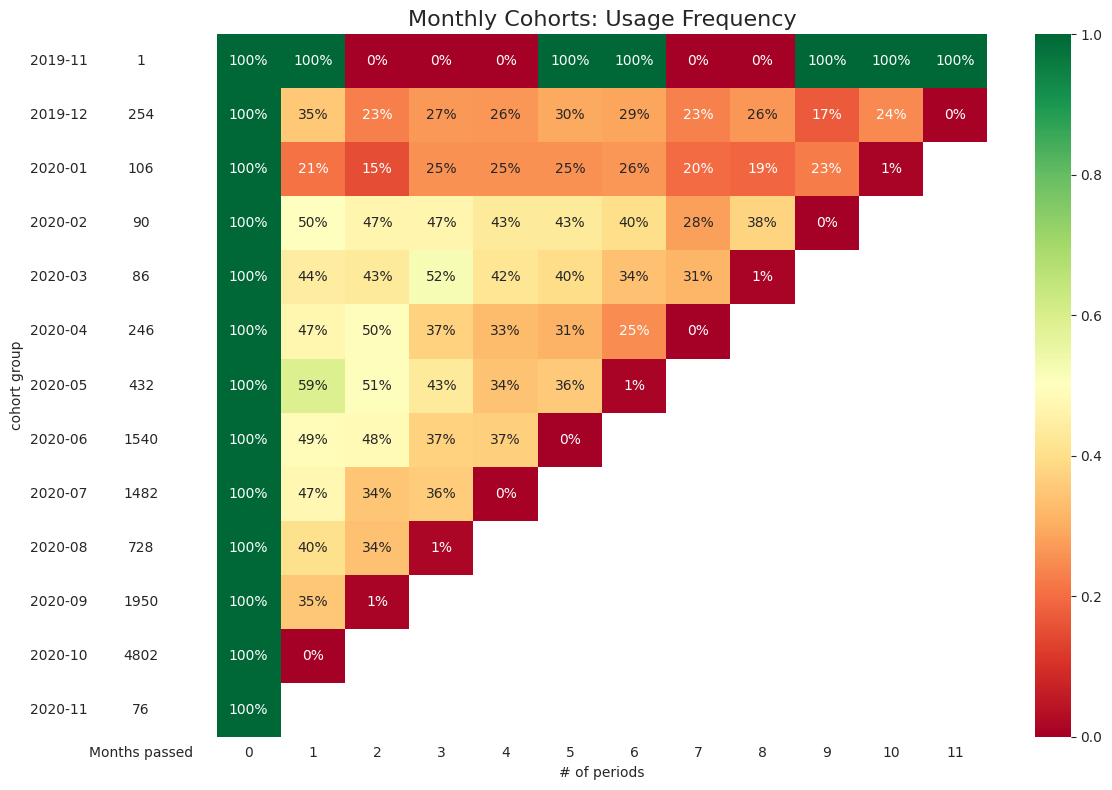

In [325]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(cohort_graph, 
                mask=cohort_graph.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: Usage Frequency', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(Initial_users).rename(columns={0: 'Months passed'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()